In [1]:
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt

# Exploring adding multiple gaussians in pandeia 
In this notebook, we're exploring adding multiple gaussians to a scene try to to make a lensed object.  We'll do the following steps:

1. We'll start with downloading one that we set up in the online ETC notebook, using three gaussians.  
1. We'll modify the `.json` file that downloaded with the ETC run, adding another gaussian.
1. We'll read in the `.json` file and add another gaussian within python (instead of editing the `.json` file manually.


#### NOTE:  
Oddly, when reading in the fits images from the online ETC, when I set the "origin" in ```plt.imshow()``` to "lower" it matches what happens when I set the pandeia-run calulations to "origin" equals "upper"...  curious why they are flipped?  Also good to know!

## 1. Creating 3 gaussian system on the online ETC

In [2]:
path = 'plots-data/downloaded_run/'

data = fits.getdata(path+'image_snr.fits')

In [3]:
data.shape,data.min(),data.max(),data.mean()

((65, 65), 3.027725542963431e-05, 48.619429733703505, 1.6443011601960626)

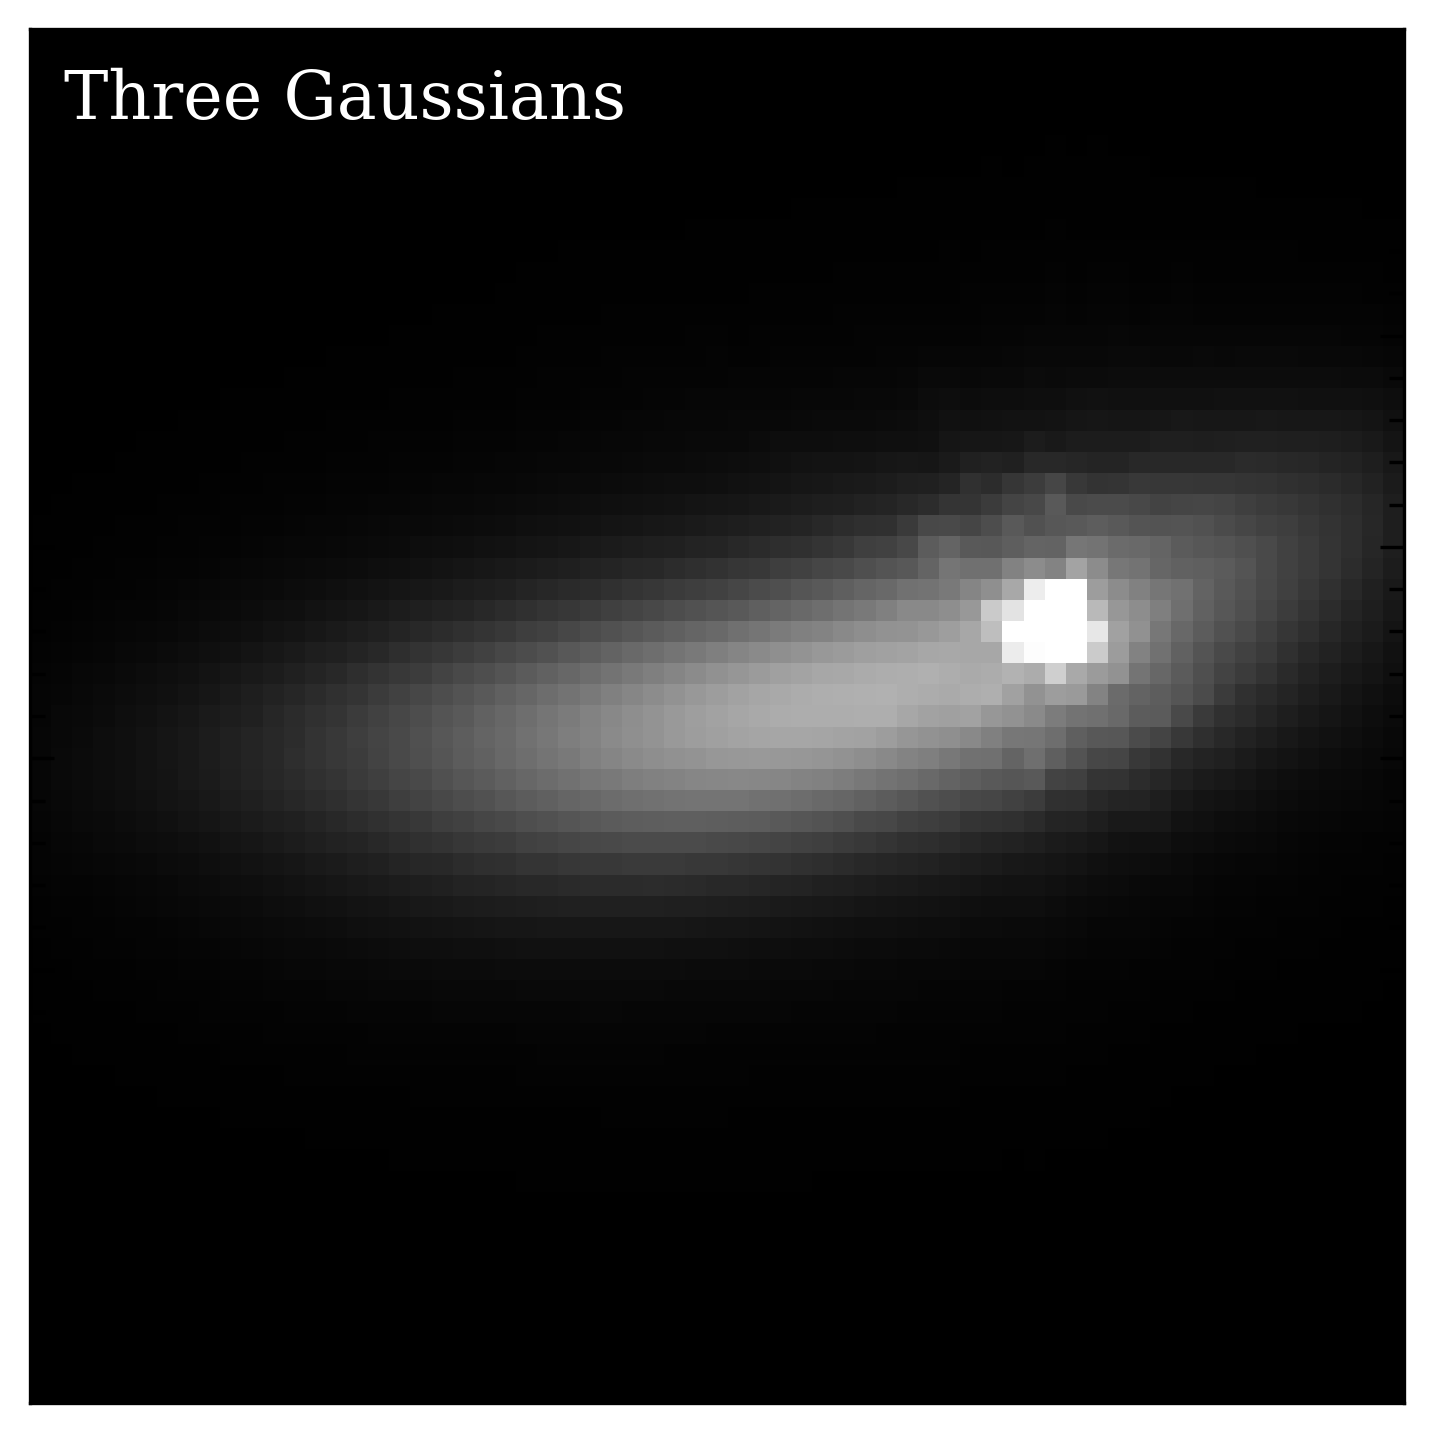

In [4]:
# plotting
plt.figure(figsize=(5,5))

plt.imshow(data,origin='lower',clim=(0,20))
plt.text(0.025,0.935,'Three Gaussians',color='w',
        transform=plt.gca().transAxes,fontsize=16)

plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([])

plt.tight_layout()
# plt.savefig(f'plots-data/gaussian3.pdf')
plt.show()
plt.close('all')

## 2. Modifying the calculation input file
I manually edited the `.json` file used above to make the three gaussian system and added a fourth one.

In [5]:
from pandeia.engine.perform_calculation import perform_calculation
import json

In [6]:
# loading in json file
with open('plots-data/gaussian4-test.json') as f:
    imgr_data = json.load(f)

In [7]:
# performing the calculation
results = perform_calculation(imgr_data)

In [8]:
results.keys()

dict_keys(['sub_reports', 'input', '1d', '2d', '3d', 'scalar', 'information', 'transform', 'warnings'])

In [9]:
results['scalar']

{'background_area': 362.48771222446203,
 'extraction_area': 32.48097779789086,
 'fraction_saturation': 0.05087232063392119,
 'sat_ngroups': 179.0,
 'brightest_pixel': 2.614177689929809,
 'filter': 'f070w',
 'disperser': None,
 'x_offset': 0.4,
 'y_offset': 0.1,
 'aperture_size': 0.1,
 'sn': 72.0487694228906,
 'extracted_flux': 8.834838377117158,
 'extracted_noise': 0.12262302948244726,
 'background_total': 9.774585211143322,
 'background_sky': 6.759887251028196,
 'contamination': 0.3084220859498241,
 'reference_wavelength': 0.6988818810532377,
 'background': 0.5041712190258931,
 'total_exposure_time': 1954.09214,
 'all_dithers_time': 1954.09214,
 'exposure_time': 1954.09214,
 'measurement_time': 1932.6186000000002,
 'saturation_time': 1954.09214,
 'total_integrations': 1,
 'duty_cycle': 0.9890109890109892,
 'cr_ramp_rate': 0.45583645644563137}

In [10]:
results['2d'].keys()

dict_keys(['detector', 'snr', 'saturation', 'ngroups_map'])

In [11]:
results['2d']['snr'].shape

(65, 65)

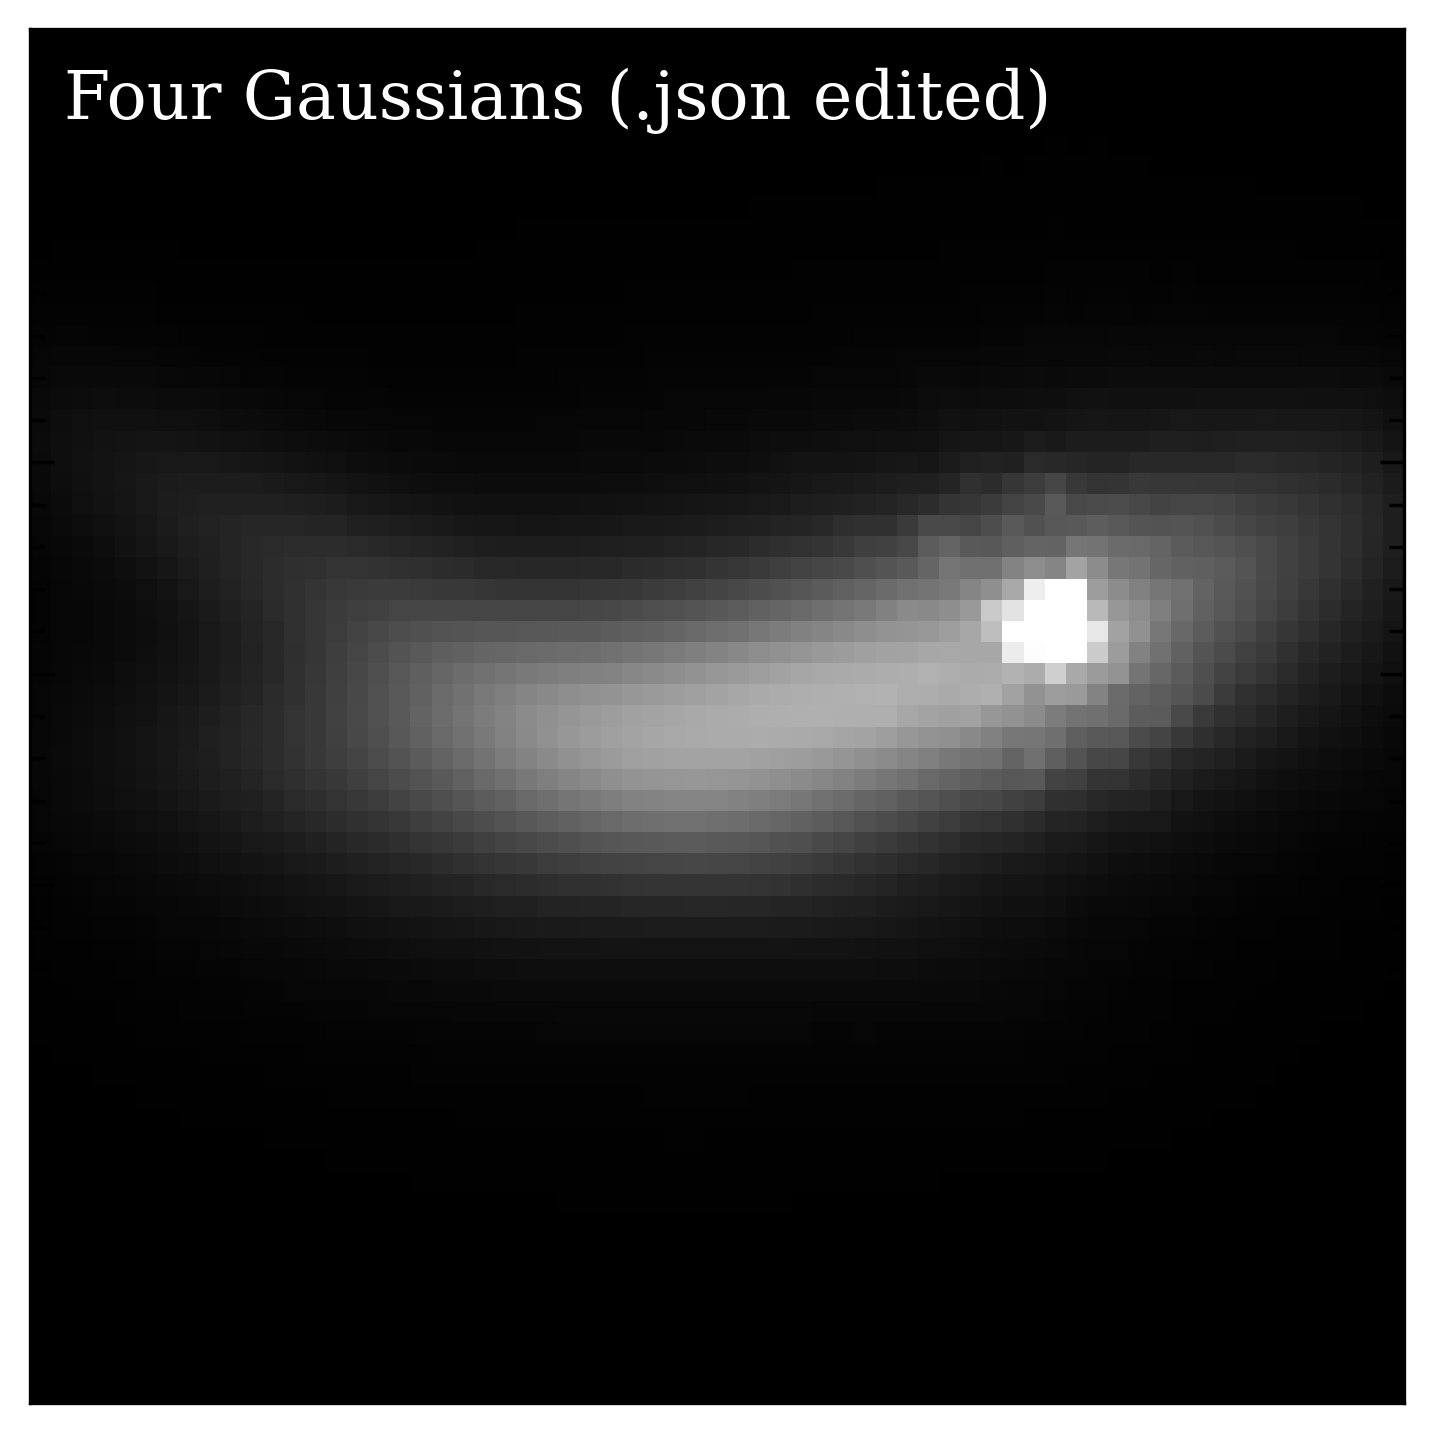

In [12]:
plt.figure(figsize=(5,5))

plt.imshow(results['2d']['snr'],origin='upper',clim=(0,20))
plt.text(0.025,0.935,'Four Gaussians (.json edited)',color='w',
        transform=plt.gca().transAxes,fontsize=16)

plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([])

plt.tight_layout()
# plt.savefig(f'plots-data/gaussian4.pdf')
plt.show()
plt.close('all')

## 3. Modifying the calculation manually within python
Now we'll read in the original 3 gaussian `.json` file and practice manually adding in the fourth source within this notebook (instead of editing the `.json` file itself.

In [13]:
# loading in json file, removing the "image" part of the path
with open(path[:-6]+'input.json') as f:
    data = json.load(f)

In [14]:
data.keys()

dict_keys(['background', 'configuration', 'scene', 'strategy'])

In [15]:
data['scene'][0].keys()

dict_keys(['id', 'position', 'shape', 'spectrum'])

In [16]:
for i in range(len(data['scene'])):
    print(f'object {data["scene"][i]["id"]}')

object 1
object 2
object 3


In [17]:
data['scene'][0]

{'id': 1,
 'position': {'orientation': 5.0, 'x_offset': 0.0, 'y_offset': 0.0},
 'shape': {'geometry': 'gaussian2d',
  'major': 0.4,
  'minor': 0.1,
  'norm_method': 'integ_infinity',
  'surf_area_units': None},
 'spectrum': {'extinction': {'bandpass': 'j',
   'law': 'mw_rv_31',
   'unit': 'mag',
   'value': 0},
  'lines': [],
  'normalization': {'norm_flux': 0.0035,
   'norm_fluxunit': 'mjy',
   'norm_wave': 2,
   'norm_waveunit': 'microns',
   'type': 'at_lambda'},
  'redshift': 0,
  'sed': {'sed_type': 'flat', 'unit': 'fnu'}}}

In [18]:
# adding a fourth object to the scene
# first, describing the object in a dictionary by copy-pasting the above output
g4 = {  'id': 4,
        'position': {'orientation': -30, 'x_offset':-0.4, 'y_offset': 0.1},
            'shape': {'geometry': 'gaussian2d',
            'major': 0.4,
            'minor': 0.08,
            'norm_method': 'integ_infinity',
            'surf_area_units': None},
        'spectrum': {'extinction': {'bandpass': 'j',
            'law': 'mw_rv_31',
            'unit': 'mag',
            'value': 0},
            'lines': [],
        'normalization': {'norm_flux': 0.001,
            'norm_fluxunit': 'mjy',
            'norm_wave': 2,
            'norm_waveunit': 'microns',
            'type': 'at_lambda'},
        'redshift': 0,
        'sed': {'sed_type': 'flat', 'unit': 'fnu'}}}

In [19]:
# adding gaussian to scene
data['scene'].append(g4)

In [20]:
# checking the number of objects now
for i in range(len(data['scene'])):
    print(f'object {data["scene"][i]["id"]}')

object 1
object 2
object 3
object 4


In [21]:
# running calculation!
new_results = perform_calculation(data)

In [22]:
new_results['scalar']

{'background_area': 362.48771222446203,
 'extraction_area': 32.48097779789086,
 'fraction_saturation': 0.05087232063392119,
 'sat_ngroups': 179.0,
 'brightest_pixel': 2.614177689929809,
 'filter': 'f070w',
 'disperser': None,
 'x_offset': 0.4,
 'y_offset': 0.1,
 'aperture_size': 0.1,
 'sn': 72.0487694228906,
 'extracted_flux': 8.834838377117158,
 'extracted_noise': 0.12262302948244726,
 'background_total': 9.774585211143322,
 'background_sky': 6.759887251028196,
 'contamination': 0.3084220859498241,
 'reference_wavelength': 0.6988818810532377,
 'background': 0.5041712190258931,
 'total_exposure_time': 1954.09214,
 'all_dithers_time': 1954.09214,
 'exposure_time': 1954.09214,
 'measurement_time': 1932.6186000000002,
 'saturation_time': 1954.09214,
 'total_integrations': 1,
 'duty_cycle': 0.9890109890109892,
 'cr_ramp_rate': 0.45583645644563137}

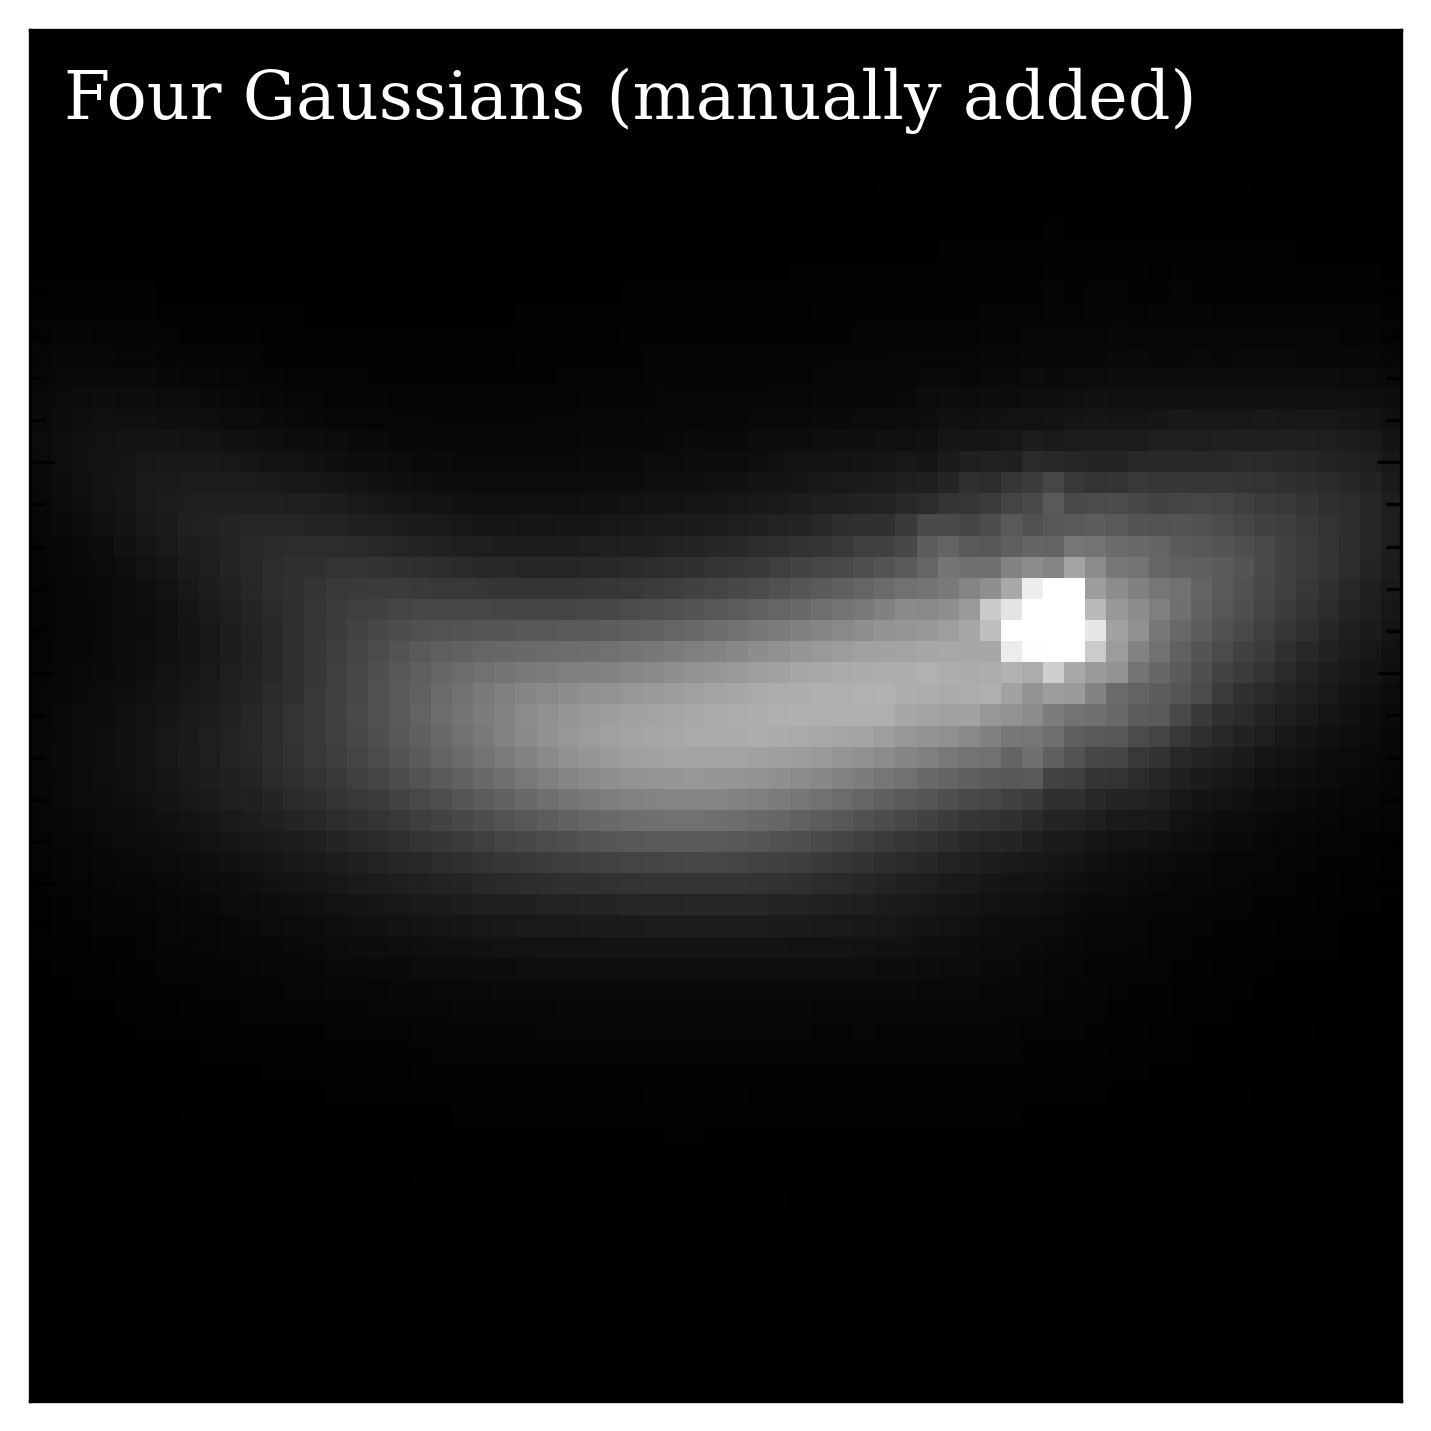

In [23]:
plt.figure(figsize=(5,5))

plt.imshow(new_results['2d']['snr'],origin='upper',clim=(0,20))
plt.text(0.025,0.935,'Four Gaussians (manually added)',color='w',
        transform=plt.gca().transAxes,fontsize=16)

plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([])

plt.tight_layout()
# plt.savefig(f'plots-data/gaussian4-manual.pdf')
plt.show()
plt.close('all')

## Comparing the manual edit versus the `.json` edit

In [24]:
difference = new_results['2d']['snr'] - results['2d']['snr']

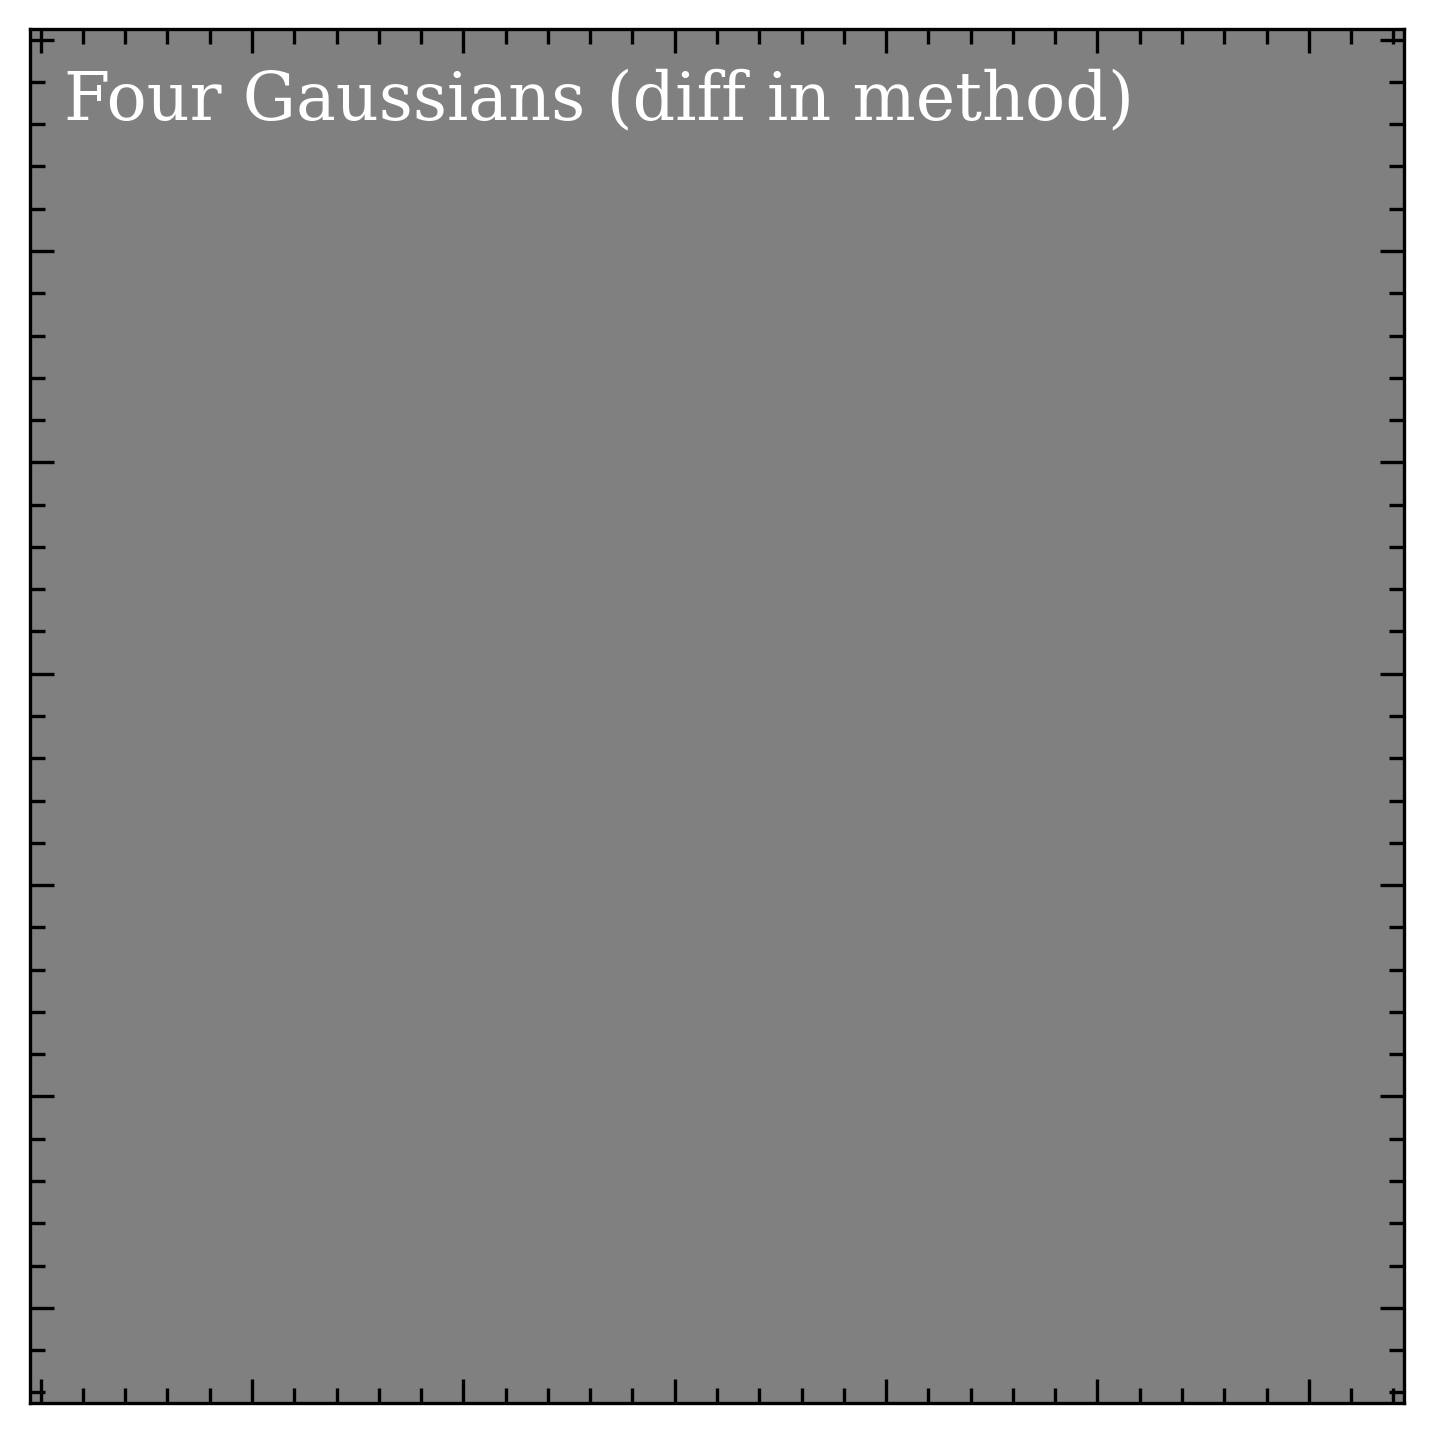

In [34]:
plt.figure(figsize=(5,5))

plt.imshow(difference,origin='upper',clim=(-1,1))
plt.text(0.025,0.935,'Four Gaussians (diff in method)',color='w',
        transform=plt.gca().transAxes,fontsize=16)

plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([])

plt.tight_layout()
plt.show()
plt.close('all')

In [33]:
# quick hack of running set on an 2d array found here
# https://stackoverflow.com/questions/31053385/get-a-set-of-2d-list-in-python

print(list(set(map(tuple,difference))))

[(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)]
